<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Exp_8_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Dependencies

In [5]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

#Set random seed for reproducibility
np.random.seed(42)

## 2. Loading the IMDB Dataset
The IMDB dataset is already preprocessed: reviews are represented as sequences

In [6]:
#Load IMDB Dataset

max_words = 10000       # Only keep the top 10,000 most frequent words
max_len = 200           # Limit reviews to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad Sequences to ensure consistent length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Check Dataset Shape
print("Training Set Shape: ", x_train.shape)
print("Test Set Shape: ", x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Set Shape:  (25000, 200)
Test Set Shape:  (25000, 200)


## 3. Build RNN Model

In [7]:
# Build RNN Model

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = 32, input_length=max_len))
model.add(SimpleRNN(32, return_sequences = False))      # Simple RNN Layer
model.add(Dense(1, activation='sigmoid'))               # Output Layer for Binary Classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Train the model
We'll train the model on the training data and use easly stopping to avoid overfitting.

In [8]:
easly_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2,
                    callbacks=[easly_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.5707 - loss: 0.6672 - val_accuracy: 0.7530 - val_loss: 0.5043
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8124 - loss: 0.4307 - val_accuracy: 0.8256 - val_loss: 0.4094
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.9019 - loss: 0.2525 - val_accuracy: 0.8244 - val_loss: 0.4419
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9481 - loss: 0.1537 - val_accuracy: 0.8194 - val_loss: 0.4780
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9772 - loss: 0.0759 - val_accuracy: 0.8070 - val_loss: 0.6074


## 5. Evaluate the model
After training, we will evaluate the model to see how well it performs.

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8031 - loss: 0.6129
Test Accuracy: 80.27


## 6. Results

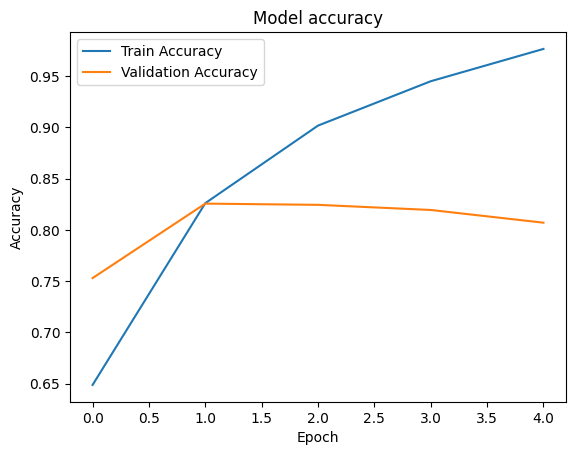

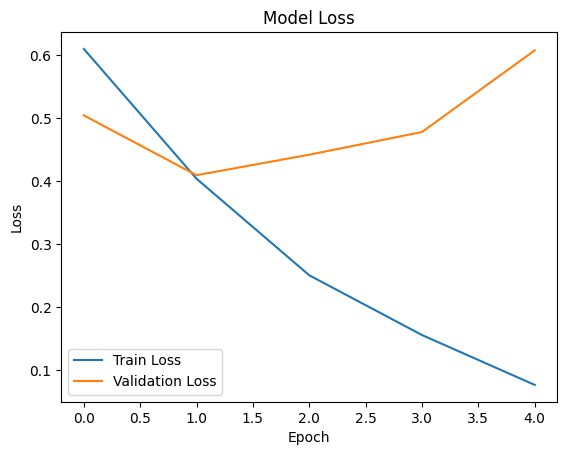

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 7. Make Predictions

In [12]:
predictions = model.predict(x_test)

# Convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


In [14]:
for i in range(10):
    print(f"Review: {i+1}")
    print(f"Predicted Sentiment: {'positive' if predicted_labels[i] == 1 else 'negative'}")
    print(f"True Sentiment: {'positive' if y_test[i] == 1 else 'negative'}")
    print("-" * 50)

Review: 1
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 2
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 3
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 4
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 5
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 6
Predicted Sentiment: negative
True Sentiment: positive
--------------------------------------------------
Review: 7
Predicted Sentiment: negative
True Sentiment: positive
--------------------------------------------------
Review: 8
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 9
Predicted Sentiment: positive
True Sentiment: negative
-------